In [1]:
# first let's import our packages
import scipy.stats as scs
from scipy.optimize import minimize # finding optimal params in models
import os                           # operating system tools
import numpy as np                  # matrix/array functions
import pandas as pd                 # loading and manipulating data

import statsmodels.stats.proportion as statprop

#import ipywidgets as widgets        # interactive display
import matplotlib.pyplot as plt     # plotting
import matplotlib as mpl
%matplotlib inline
import random

import psytrack as psy
import clusteringFns as clf
import reinforcementLearningFns as rlf
import plotFns as psyplt
import helperFns as mf
import fitFns as fns
import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tslearn
from tslearn.clustering import TimeSeriesKMeans

curPath = os.path.abspath(os.getcwd())

%load_ext autoreload
%autoreload 2

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

np.random.seed(2021)                # set seed for reproducibility


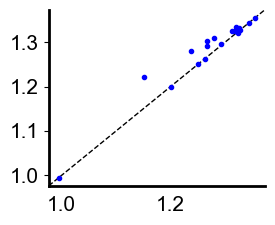

NameError: name 'explIDs' is not defined

In [2]:
f2 = rlf.loadModelFit(2)
f2 = f2[['id','aic','bic','N']]
f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f2,f4)
f['bic42'] = (f['bic_4'] - f['bic_2'])/f['N']
f['aic42'] = (f['aic_4'] - f['aic_2'])/f['N']
d = f['aic_4'] - f['aic_2']


f_4.set_index('id', inplace = True)

fig, ax = plt.subplots(figsize = (3,2.5))

#ax.plot((f['aic_4']), (-1*2*np.log(0.5)*f['N']),'b.')

ax.plot((f['bic_4']/f['N']), (f['bic_2']/f['N']),'b.', markersize = 6)
ax.axline((1.2,1.2), slope = 1, linewidth = 1, color='k', linestyle = '--', zorder = 0)

# ax.boxplot(d)
# x = np.random.normal(1, 0.01, size=len(d))
# ax.plot(x, d, 'k.', alpha=0.5)
# ax.axhline(0, color = 'k', linestyle = '--')

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    #labelbottom=False
    ) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

plt.tight_layout()
plt.show()

img_name = 'bic_scatter'
img_loc = 'rl_model'
 
image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

##

f_4['cluster'] = 'N/A'
f_4.loc[explIDs,'cluster'] = 'expl'
f_4.loc[noExplIDs,'cluster'] = 'no_expl'

#fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
#f_4.to_csv(pathtmp + img_name + '.csv')


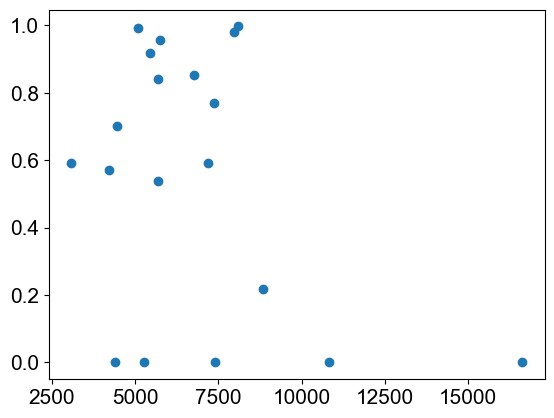

In [16]:
plt.scatter(f_4['N'], np.exp(-1*f_4['beta']))


In [14]:
#scs.ttest_rel(f['aic_4']/f['N'],f['aic_2']/f['N'], alternative = 'less')

#scs.ttest_rel(f['aic_4']/f['N'],f['aic_2']/f['N'], alternative = 'less')

scs.wilcoxon(f['bic_4'],f['bic_2'], alternative = 'less')


WilcoxonResult(statistic=29.0, pvalue=0.00308990478515625)

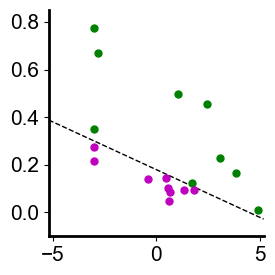

In [90]:
f2 = rlf.loadModelFit(2)
f2 = f2[['id','aic','bic', 'N']]
f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f2,f4)

f['bic42'] = f['bic_4'] - f['bic_2']
f['aic42'] = f['aic_4'] - f['aic_2']

f_4.set_index('id', inplace = True)

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC059', 'JC062', 'JC061', 'JC052']
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030', 'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #, 

#expl = f.loc[explIDs,'aic42']
#nexpl = f.loc[noExplIDs,'aic42']

fig, ax = plt.subplots(figsize = (3,3))

plt.plot(np.log(f_4.loc[explIDs,'beta']**-1), np.abs(f_4.loc[explIDs,'init_Q']), 'go', markersize = 5)
plt.plot(np.log(f_4.loc[noExplIDs,'beta']**-1), np.abs(f_4.loc[noExplIDs,'init_Q']), 'mo', markersize = 5)

ax.axline((2,0.1), slope = -.04, linewidth = 1, color='k', linestyle = '--', zorder = 0)

ax.set_ylim(-0.1, 0.85)
ax.set_xlim(-5.2, 5.2)
ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True
    ) # labels along the bottom edge are off

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

plt.tight_layout()
plt.show()

img_name = '4_parameter_linear_sep'
img_loc = 'rl_model'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 


##

f_4['cluster'] = 'N/A'
f_4.loc[explIDs,'cluster'] = 'expl'
f_4.loc[noExplIDs,'cluster'] = 'no_expl'

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
f_4.to_csv(pathtmp + img_name + '.csv')


In [150]:
f2 = rlf.loadModelFit(2)
f4 = rlf.loadModelFit(4)

In [154]:
np.exp(-1 * (f2['nLL']/f2['N']))

iteration
0    0.517242
0    0.511400
0    0.550050
0    0.515466
0    0.514674
0    0.513659
0    0.515904
0    0.523834
0    0.524528
0    0.522145
0    0.532600
0    0.516534
0    0.508626
0    0.528308
0    0.535615
0    0.543812
0    0.520151
0    0.516123
0    0.610093
dtype: float64

In [153]:
np.exp(-1 * (f4['nLL']/f4['N']))

iteration
0    0.517290
0    0.511760
0    0.550689
0    0.515838
0    0.517088
0    0.517871
0    0.516666
0    0.525899
0    0.531440
0    0.532773
0    0.532965
0    0.518721
0    0.509047
0    0.540478
0    0.536963
0    0.564377
0    0.528734
0    0.520314
0    0.611379
dtype: float64

0.000821295710674015


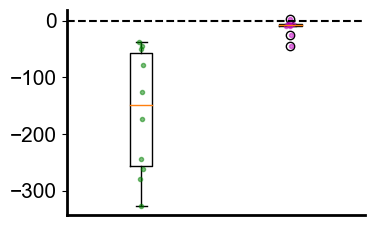

In [91]:
f2 = rlf.loadModelFit(2)
f2 = f2[['id','aic','bic']]
f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f2,f4)

f['bic42'] = f['bic_4'] - f['bic_2']
f['aic42'] = f['aic_4'] - f['aic_2']

f.set_index('id', inplace = True)

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC052', 'JC059', 'JC061', 'JC062'] # 
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030', 'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #, 

#explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC059', 'JC062'] # 'JC061', 
#noExplIDs = [ 'GS028', 'GS030', 'JC025', 'JC044', 'JC048'] #, 'JC052']
#explRD_IDs = ['GS027', 'GS029', 'JC057', 'JC067']

expl = f.loc[explIDs,'aic42']
nexpl = f.loc[noExplIDs,'aic42']
#rexpl = f.loc[explRD_IDs,'aic42']

a,b = scs.ttest_ind(expl, nexpl)
print(b)

fig, ax = plt.subplots(figsize = (4,2.5))

ax.boxplot((expl, nexpl))

x = np.random.normal(1, 0.01, size=len(expl))
ax.plot(x, expl, 'g.', alpha=0.5)

x = np.random.normal(2, 0.01, size=len(nexpl))
ax.plot(x, nexpl, 'm.', alpha=0.5)

#x = np.random.normal(3, 0.01, size=len(rexpl))
#ax.plot(x, rexpl, 'b.', alpha=0.5)


ax.axhline(0, color = 'k', linestyle = '--')

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    ) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

plt.tight_layout()
plt.show()

img_name = 'aic_comparing_no_52'
img_loc = 'rl_model'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

expl = pd.DataFrame(expl)
nexpl = pd.DataFrame(nexpl)
expl['cluster'] = 'expl'
nexpl['cluster'] = 'no_expl'

toSave = pd.concat([expl, nexpl], axis = 0)

#fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
#toSave.to_csv(pathtmp + img_name + '.csv')

In [449]:
explf3 = rlf.loadModelFit(3)
explf3
#f2 = f2[['id','aic','bic']]
#f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

,id,bias,alpha,beta,init_Q,nLL,N,D,aic,bic
iteration,,,,,,,,,,
0,GS027,-0.004993,0.000103,NaN,0.048213,4454.188580,6757,3,8914.377160,8934.832163
0,GS028,-0.113771,0.000077,NaN,-0.215888,4947.881973,7386,3,9901.763946,9922.485971
0,GS029,-0.130863,0.000267,NaN,-0.136932,2516.729088,4215,3,5039.458176,5058.497390
0,GS030,-0.054520,0.000070,NaN,-0.201773,5845.287105,8830,3,11696.574210,11717.831941
0,GS037,-0.237348,0.000094,NaN,-0.452122,3791.466379,5731,3,7588.932758,7608.893694
0,GS040,0.011326,0.000082,NaN,0.074508,5304.066256,7963,3,10614.132511,10635.080195
0,JC025,0.141500,0.000041,NaN,0.273952,10977.795133,16624,3,21961.590267,21984.746075
0,JC028,-0.154600,0.000180,NaN,-0.348583,3380.317242,5260,3,6766.634485,6786.338144
0,JC029,-0.305627,0.000086,NaN,-0.670324,6842.557436,10824,3,13691.114871,13712.983435


In [450]:
explf4 = rlf.loadModelFit(4)
explf4

,id,bias,alpha,beta,init_Q,nLL,N,D,aic,bic
iteration,,,,,,,,,,
0,GS027,-0.007146,0.000673,0.158063,0.095229,4453.884478,6757,4,8915.768956,8943.042293
0,GS028,-0.113788,0.000077,20.000000,-0.215925,4947.881973,7386,4,9903.763947,9931.393313
0,GS029,-0.095495,0.000653,0.558727,-0.100996,2514.606349,4215,4,5037.212697,5062.598317
0,GS030,-0.023802,0.000088,1.519444,-0.141680,5845.133017,8830,4,11698.266034,11726.609675
0,GS037,-0.048194,0.002257,0.045240,-0.230169,3779.833610,5731,4,7567.667220,7594.281801
0,GS040,-0.020647,0.003490,0.021313,-0.165101,5239.891855,7963,4,10487.783709,10515.713954
0,JC025,0.141545,0.000041,20.000000,0.274056,10977.795136,16624,4,21963.590273,21994.464684
0,JC028,-0.154595,0.000180,20.000000,-0.348576,3380.317242,5260,4,6768.634485,6794.906030
0,JC029,-0.305610,0.000086,16.984299,-0.670284,6842.557437,10824,4,13693.114874,13722.272959


In [454]:
explf4['aic'] - explf3['aic']

iteration
0      1.391796
0      2.000000
0     -2.245478
0      1.691824
0    -21.265538
0   -126.348802
0      2.000006
0      2.000000
0      2.000003
0      2.000000
0     -0.312849
0    -13.159239
0     -1.166080
0   -169.302988
0      1.907048
0    -45.220445
0   -175.542257
0    -71.917814
0     -0.431455
Name: aic, dtype: float64

In [114]:
explf2 = rlf.loadModelFit(2)
f2 = f2[['id','aic','bic']]
f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f2,f4)

f['bic42'] = f['bic_4'] - f['bic_2']
f['aic42'] = f['aic_4'] - f['aic_2']

f.set_index('id', inplace = True)

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC052', 'JC059', 'JC061', 'JC062'] # 
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030', 'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #, 

#explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC059', 'JC062'] # 'JC061', 
#noExplIDs = [ 'GS028', 'GS030', 'JC025', 'JC044', 'JC048'] #, 'JC052']
#explRD_IDs = ['GS027', 'GS029', 'JC057', 'JC067']

expl = f.loc[explIDs,'aic42']
nexpl = f.loc[noExplIDs,'aic42']
#rexpl = f.loc[explRD_IDs,'aic42']

a,b = scs.ttest_ind(expl, nexpl)
print(b)

fig, ax = plt.subplots(figsize = (4,2.5))

ax.boxplot((expl, nexpl))

x = np.random.normal(1, 0.01, size=len(expl))
ax.plot(x, expl, 'g.', alpha=0.5)

x = np.random.normal(2, 0.01, size=len(nexpl))
ax.plot(x, nexpl, 'm.', alpha=0.5)

#x = np.random.normal(3, 0.01, size=len(rexpl))
#ax.plot(x, rexpl, 'b.', alpha=0.5)


ax.axhline(0, color = 'k', linestyle = '--')

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    ) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

plt.tight_layout()
plt.show()

img_name = 'aic_comparing_no_52'
img_loc = 'rl_model'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

expl = pd.DataFrame(expl)
nexpl = pd.DataFrame(nexpl)
expl['cluster'] = 'expl'
nexpl['cluster'] = 'no_expl'

toSave = pd.concat([expl, nexpl], axis = 0)

#fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
#toSave.to_csv(pathtmp + img_name + '.csv')

,bic42,cluster
id,,
GS037,-36.331936,expl
GS040,-112.074832,expl
JC028,-24.248050,expl
JC029,-264.812071,expl
JC039,-159.821266,expl
JC047,-30.759329,expl
JC059,-313.852928,expl
JC062,-65.100300,expl


0.03708716681933521


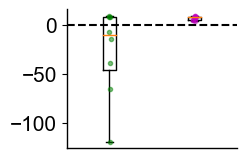

In [2]:
f2 = rlf.loadModelFit(2)
f2 = f2[['id','aic','bic']]
f2.rename(columns = {'aic':'aic_2','bic':'bic_2'}, inplace = True)

f3 = rlf.loadModelFit(3)
f3 = f3[['id','aic','bic']]
f3.rename(columns = {'aic':'aic_3','bic':'bic_3'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f3,f4)

f['bic43'] = f['bic_4'] - f['bic_3']
f['aic43'] = f['aic_4'] - f['aic_3']

f.set_index('id', inplace = True)

#explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC052', 'JC059', 'JC061', 'JC062'] # 
#noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030', 'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #, 

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047',  'JC059', 'JC062'] # 
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030',  'JC025', 'JC044', 'JC048', 'JC052', 'JC057', 'JC061', 'JC067'] #, 

#explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047', 'JC059', 'JC062'] # 'JC061', 
#noExplIDs = [ 'GS028', 'GS030', 'JC025', 'JC044', 'JC048'] #, 'JC052']
#explRD_IDs = ['GS027', 'GS029', 'JC057', 'JC067']

# Now, excluding JC052 and JC061 because they weren't consistently classified compared to all of the other traces.

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047',  'JC059', 'JC062'] # 
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030',  'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #,'JC061', 'JC052', 


expl = f.loc[explIDs,'bic43']
nexpl = f.loc[noExplIDs,'bic43']
#rexpl = f.loc[explRD_IDs,'aic42']

a,b = scs.ttest_ind(expl, nexpl)
print(b)

fig, ax = plt.subplots(1,1)

ax.boxplot((expl, nexpl))

x = np.random.normal(1, 0.01, size=len(expl))
ax.plot(x, expl, 'g.', alpha=0.5)

x = np.random.normal(2, 0.01, size=len(nexpl))
ax.plot(x, nexpl, 'm.', alpha=0.5)

#x = np.random.normal(3, 0.01, size=len(rexpl))
#ax.plot(x, rexpl, 'b.', alpha=0.5)

ax.axhline(0, color = 'k', linestyle = '--')


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    ) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

fig.set_size_inches(2.2,1.8)

#plt.tight_layout()
plt.show()

img_name = 'bic_comparing_43'
img_loc = 'rl_model'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

expl = pd.DataFrame(expl)
nexpl = pd.DataFrame(nexpl)
expl['cluster'] = 'expl'
nexpl['cluster'] = 'no_expl'

toSave = pd.concat([expl, nexpl], axis = 0)

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
toSave.to_csv(pathtmp + img_name + '.csv')

In [3]:
expl

,bic43,cluster
id,,
GS037,-14.611893,expl
GS040,-119.366241,expl
JC028,8.567886,expl
JC029,9.289524,expl
JC039,8.385260,expl
JC047,-6.513125,expl
JC059,-38.818887,expl
JC062,-65.384747,expl


In [478]:
a,b = statprop.proportions_ztest((5,0),(8,9))
print(a)
print(b)

2.8228974476590536
0.004759179217262941


In [473]:
a,b = statprop.proportions_ztest((5,3),(5,12))
print(a)
print(b)

2.8228974476590536
0.004759179217262941


In [323]:
IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC052', 'JC057', 'JC059', 'JC061', 'JC062', 'JC067')
#IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC057', 'JC059', 'JC062', 'JC067') #   'JC052', 'JC061',

dataBase =  os.path.abspath(os.path.join(curPath,"data/230928/"))

smoothF = 15
smooth2 = 5
nPoints = 100

sizeQ = False

rawTraceMat = np.full([len(IDs),nPoints*3], np.nan)
signedTraceMat = rawTraceMat.copy()
diffTraceMat = rawTraceMat.copy()

nPointsVec = np.full([len(IDs),1], np.nan)

for idi, ID in enumerate(IDs):

    loaded_dict = mf.loadSavedFits(ID, dataBase, ending = '_trainingDataBias')

    acc = np.array(loaded_dict['correct'])
    cat = np.array(loaded_dict['answer'])
    emptyMat = np.empty((1,np.size(acc)))
    emptyMat[:] = np.nan
    emptyMat = emptyMat.squeeze()
    acc_low = emptyMat.copy()
    acc_high = emptyMat.copy()
    acc_low[cat == 1] = acc[cat == 1]
    acc_high[cat == 2] = acc[cat == 2]

    nPointsT, wModeRaws, wModeSigned, wModeDiff, wModeAvg = clf.smoothLearningTraces(acc_low, acc_high, nPoints = nPoints, smoothF = smoothF, smooth2 = smooth2, sameSize = sizeQ)

    if np.size(wModeRaws) > np.size(rawTraceMat,1):
        adn = np.full([np.size(rawTraceMat,0),np.size(wModeRaws) - np.size(rawTraceMat,1)], np.nan)
        
        rawTraceMat = np.hstack([rawTraceMat, adn])
        #signedTraceMat = np.hstack([signedTraceMat, adn])
        diffTraceMat = np.hstack([diffTraceMat, adn])

    elif np.size(wModeRaws) < np.size(rawTraceMat,1):
        adn = np.squeeze(np.full([1, np.size(rawTraceMat,1) - np.size(wModeRaws)], np.nan))

        wModeRaws = np.hstack([wModeRaws, adn])
        wModeSigned = np.hstack([wModeSigned, adn])
        wModeDiff = np.hstack([wModeDiff, adn])

    rawTraceMat[idi,:] = wModeRaws
    #signedTraceMat[idi,:] = wModeSigned
    diffTraceMat[idi,:] = wModeDiff

    nPointsVec[idi] = nPointsT

#signedTraceMat = pd.DataFrame(signedTraceMat, index = IDs)



In [2]:
##### RUN

IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC052', 'JC057', 'JC059', 'JC061', 'JC062', 'JC067')

dataBase =  os.path.abspath(os.path.join(curPath,"data/230928/"))

smoothF = 15
nPoints = 100
smooth2 = 5

sizeQ = True

rawTraceMatResized = np.full([len(IDs),nPoints*3], np.nan)
signedTraceMatResized = np.full([len(IDs),nPoints*2], np.nan)
diffTraceMatResized = rawTraceMatResized.copy()

nPointsVec = np.full([len(IDs),1], np.nan)

avgTraceMatResized = np.full([len(IDs),nPoints], np.nan)

for idi, ID in enumerate(IDs):

    loaded_dict = mf.loadSavedFits(ID, dataBase, ending = '_trainingDataBias')

    acc = np.array(loaded_dict['correct'])
    cat = np.array(loaded_dict['answer'])
    emptyMat = np.empty((1,np.size(acc)))
    emptyMat[:] = np.nan
    emptyMat = emptyMat.squeeze()
    acc_low = emptyMat.copy()
    acc_high = emptyMat.copy()
    acc_low[cat == 1] = acc[cat == 1]
    acc_high[cat == 2] = acc[cat == 2]

    nPointsT, wModeRaws, wModeSigned, wModeDiff, wModeAvg = clf.smoothLearningTraces(acc_low, acc_high, nPoints = nPoints, smoothF = smoothF, smooth2 = smooth2, sameSize = sizeQ)

    if np.size(wModeRaws) > np.size(rawTraceMatResized,1):
        adn = np.full([np.size(rawTraceMatResized,0),np.size(wModeRaws) - np.size(rawTraceMatResized,1)], np.nan)
        
        rawTraceMatResized = np.hstack([rawTraceMatResized, adn])
        signedTraceMatResized = np.hstack([signedTraceMatResized, adn])
        diffTraceMatResized = np.hstack([diffTraceMatResized, adn])
        avgTraceMatResized = np.hstack([avgTraceMatResized, adn])

    elif np.size(wModeRaws) < np.size(rawTraceMatResized,1):
        adn = np.squeeze(np.full([1, np.size(rawTraceMatResized,1) - np.size(wModeRaws)], np.nan))

        wModeRaws = np.hstack([wModeRaws, adn])
        wModeSigned = np.hstack([wModeSigned, adn])
        wModeDiff = np.hstack([wModeDiff, adn])
        wModeAvg = np.hstack([wModeAvg, adn])

    rawTraceMatResized[idi,:] = wModeRaws
    signedTraceMatResized[idi,:] = wModeSigned
    diffTraceMatResized[idi,:] = wModeDiff
    avgTraceMatResized[idi,:] = wModeAvg

signedTraceMatResized = pd.DataFrame(signedTraceMatResized, index = IDs)
avgTraceMatResized = pd.DataFrame(avgTraceMatResized, index = IDs)


In [86]:
rm = [] #'JC052', 'JC061']

temp = signedTraceMatResized.drop(rm)

temp = avgTraceMatResized.drop(rm)

#X = np.asarray(signedTraceMat, dtype = "object")
X = temp #Resized
X = tslearn.utils.to_time_series_dataset(X)

seed = 1008 # +10

met = "dtw"

nn = 50
mx = 6

ssd_mat_r = np.zeros((nn, mx))

for ni, n in enumerate(range(0,nn)):
    
    models = []
    km = TimeSeriesKMeans(n_clusters=1, metric=met, max_iter=10)
    km.fit(X)
    models.append(km)
    
    seed = seed + 1
    for k in range(2, mx + 1):
        #idx_new_center = np.random.choice(X.shape[0])
        #barycenters_init = np.vstack((models[-1].cluster_centers_, X[np.newaxis, idx_new_center]))
        km = TimeSeriesKMeans(n_clusters=k, metric=met, max_iter=50, random_state=seed) #, init = barycenters_init)
        km.fit(X)
        models.append(km)

    ssd = []
    nk = []
    for km in models:
        ssd.append(km.inertia_)
        nk.append(km.n_clusters)

    ssd_mat_r[ni,] = ssd



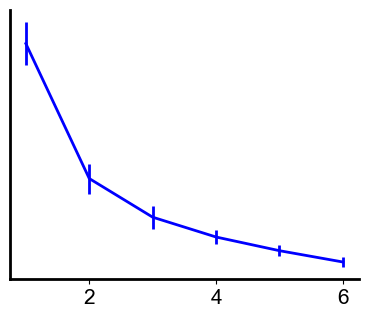

In [87]:
fig, axs = plt.subplots(1,1, figsize=(4.5 , 3.5))

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

axs.spines[['right', 'top']].set_visible(False)
axs.spines[['left', 'bottom']].set_linewidth(2)
axs.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False, # labels along the bottom edge are off
)

axs.set_xticks((2,4,6))
#axs.plot(nk, ssd, 'bx-', zorder = 1)
axs.errorbar(nk, np.mean(ssd_mat_r,0), yerr = np.std(ssd_mat_r,0), fmt = 'b-', linewidth = 2)
#axs.plot(nk, np.mean(ssd_mat,0), 'bx-', zorder = 1)
#axs.set_xlabel('Number of Clusters')
#axs.set_ylabel('Sum of Squared Distances')
#axs.set_title('Elbow Method For Optimal K')

#plt.tight_layout()
plt.show()

# img_name = 'DTW_clustering_no_52_61_mice_SSD_og_size'
# img_loc = 'clustering'

# image_format = 'svg' # e.g .png, .svg, etc.
# pathtmp = 'paper_figures/' + img_loc + '/' 

# dat = {'k': nk,
#        'ssd': ssd
#        }
# toSave = pd.DataFrame(dat)

# fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
# toSave.to_csv(pathtmp + img_name + '.csv')



135
[0.52564478 0.49828824 0.47627593 0.45965779 0.44840572 0.42301209
 0.41052852 0.40505577 0.40323984 0.40067801 0.39827151 0.39783287
 0.39917801 0.39883176 0.39895596 0.39971675 0.39591568 0.39304394
 0.3955963  0.4002232  0.40069117 0.40069068 0.40264002 0.40461999
 0.40454702 0.41096357 0.42212735 0.43127268 0.44027908 0.45423878
 0.46814234 0.47662085 0.48125473 0.4875216  0.4898959  0.48400695
 0.4780104  0.47272695 0.46152156 0.44918159 0.44233423 0.43515198
 0.42417901 0.41932443 0.42178452 0.42646001 0.43285135 0.44142189
 0.44631345 0.44430125 0.44273481 0.44114752 0.43690425 0.42963326
 0.42008027 0.41007026 0.41089775 0.41615789 0.42765963 0.44429272
 0.46001391 0.46532757 0.46732484 0.46170951 0.44717829 0.42051698
 0.39072791 0.35787649 0.3258628  0.29394984 0.26747222 0.24512557
 0.23331957 0.22780459 0.23330513 0.2506668  0.27357271 0.29466075
 0.31491104 0.33228237 0.34268755 0.34974307 0.35568274 0.35971992
 0.36248016 0.36276488 0.35731699 0.35658566 0.36077235 0.

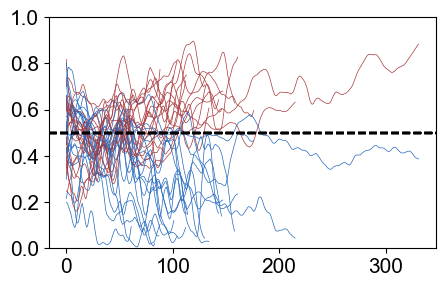

In [341]:
Xp = np.array(rawTraceMat)
fig, axs = psyplt.plotDifSizeClustersAvgOnlyOneAx(Xp, np.zeros([len(Xp),1]), nPointsVec, plotAvg = False)

In [321]:
rawTraceMat[0,:]

array([0.52564478, 0.49828824, 0.47627593, 0.45965779, 0.44840572,
       0.42301209, 0.41052852, 0.40505577, 0.40323984, 0.40067801,
       0.39827151, 0.39783287, 0.39917801, 0.39883176, 0.39895596,
       0.39971675, 0.39591568, 0.39304394, 0.3955963 , 0.4002232 ,
       0.40069117, 0.40069068, 0.40264002, 0.40461999, 0.40454702,
       0.41096357, 0.42212735, 0.43127268, 0.44027908, 0.45423878,
       0.46814234, 0.47662085, 0.48125473, 0.4875216 , 0.4898959 ,
       0.48400695, 0.4780104 , 0.47272695, 0.46152156, 0.44918159,
       0.44233423, 0.43515198, 0.42417901, 0.41932443, 0.42178452,
       0.42646001, 0.43285135, 0.44142189, 0.44631345, 0.44430125,
       0.44273481, 0.44114752, 0.43690425, 0.42963326, 0.42008027,
       0.41007026, 0.41089775, 0.41615789, 0.42765963, 0.44429272,
       0.46001391, 0.46532757, 0.46732484, 0.46170951, 0.44717829,
       0.42051698, 0.39072791, 0.35787649, 0.3258628 , 0.29394984,
       0.26747222, 0.24512557, 0.23331957, 0.22780459, 0.23330

In [319]:
rawTraceMat['0']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

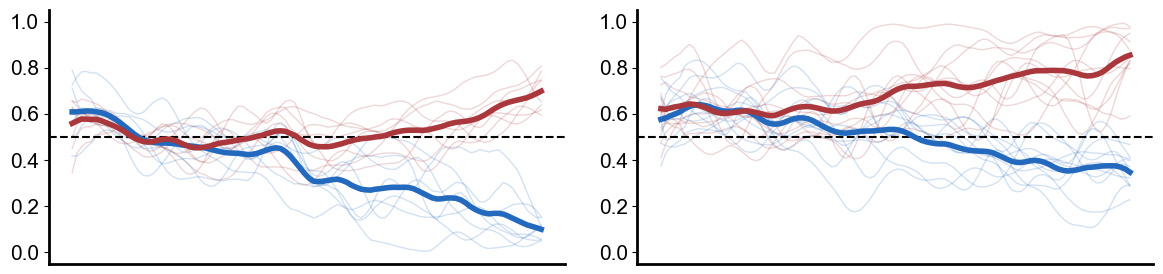

['GS037' 'GS040' 'JC028' 'JC029' 'JC039' 'JC047' 'JC059' 'JC062']
['GS027' 'GS028' 'GS029' 'GS030' 'JC025' 'JC044' 'JC048' 'JC052' 'JC057'
 'JC061' 'JC067']


In [122]:
ids = np.array(IDs)
ids = np.setdiff1d(ids, np.array(rm))

choice = 2

models = np.array(models)
model = models[np.array(nk) == choice][0]

model.fit(X)
x_pred = model.predict(X)

Xp = signedTraceMatResized.drop(rm)
Xp = np.asarray(Xp)

fig, axs = psyplt.plotClusters(Xp, x_pred, nPoints)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for ax in axs:

    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)
    ax.set_ylim(-0.05,1.05)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

fig.set_size_inches(12,3)

plt.tight_layout()
plt.show()

for ia in np.unique(x_pred):
    print(ids[x_pred == ia])

img_name = 'DTW_clustering_avg_only_none_removed_k' + str(choice)
img_loc = 'clustering'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

toSave = pd.DataFrame(Xp)
toSave.insert(loc = 0, column = 'clusterID', value = x_pred)
toSave.insert(loc = 0, column = 'id', value = ids)
toSave.set_index('id', inplace = True)

#fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
#toSave.to_csv(pathtmp + img_name + '.csv')


In [5]:
##### RUN

from scipy.stats import linregress

ids = np.array(['JC067', 'GS029', 'JC057', 'JC044', 'JC025',  'GS030', 'GS028', 'JC061', 'JC048', 'JC052', 'GS027',
                'JC028', 'JC062', 'JC029', 'GS040', 'JC039','GS037',  'JC059', 'JC047']) #avg ,  

rm = []

x_pred = np.array(range(0,len(ids)))
#x_pred = np.flip(x_pred)

Xp = avgTraceMatResized.drop(rm)

Xp = np.asarray(Xp)
XpD = pd.DataFrame(Xp,index = IDs)
XpD = XpD.loc[ids]
Xp = np.asarray(XpD)

In [6]:
##### RUN

test = 'slope'
nPointsTemp = int(np.round(nPoints))


####

df = XpD.iloc[:,0:nPointsTemp].copy()
df[['slope','intercept','r','p','se']] = df.apply(lambda x: linregress(range(1,len(x.dropna())+1), x.dropna().values), axis=1).apply(pd.Series)

print(df[['slope','intercept','r','p','se']])

df['label'] = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

dfc = df.copy()

dfc_1 = dfc.loc[dfc['label'] == 1,:]
dfc_1 = dfc_1.sort_values(test, ascending = False)

dfc_0 = dfc.loc[dfc['label'] == 0,:]
dfc_0 = dfc_0.sort_values(test, ascending = False)

print(scs.ttest_ind(dfc_0[test], dfc_1[test]))

dfc = pd.concat([dfc_0, dfc_1],axis = 0)

ordered = np.array(dfc.index)
ordered

          slope  intercept         r             p        se
JC067 -0.001147   0.788441 -0.400115  3.715096e-05  0.000265
GS029  0.000812   0.628124  0.553643  2.308340e-09  0.000123
JC057  0.001405   0.545707  0.622984  4.478843e-12  0.000178
JC044 -0.001319   0.683919 -0.422163  1.214988e-05  0.000286
JC025  0.000525   0.530478  0.333139  7.071439e-04  0.000150
GS030 -0.001135   0.637607 -0.691569  1.643263e-15  0.000120
GS028  0.000686   0.507375  0.443065  3.907450e-06  0.000140
JC061 -0.001503   0.650980 -0.491277  2.104278e-07  0.000269
JC048  0.000045   0.538832  0.020278  8.412876e-01  0.000222
JC052 -0.002137   0.651593 -0.459981  1.474381e-06  0.000417
GS027 -0.000075   0.565337 -0.025631  8.001679e-01  0.000294
JC028 -0.001453   0.549626 -0.717962  4.225372e-17  0.000142
JC062 -0.000936   0.512043 -0.336746  6.130999e-04  0.000264
JC029 -0.002630   0.572778 -0.820195  1.660550e-25  0.000185
GS040  0.000227   0.451519  0.064627  5.229457e-01  0.000355
JC039 -0.003232   0.6101

array(['JC057', 'GS029', 'GS028', 'JC025', 'JC048', 'GS027', 'GS030',
       'JC067', 'JC044', 'JC061', 'JC052', 'GS040', 'JC062', 'GS037',
       'JC028', 'JC047', 'JC029', 'JC039', 'JC059'], dtype=object)

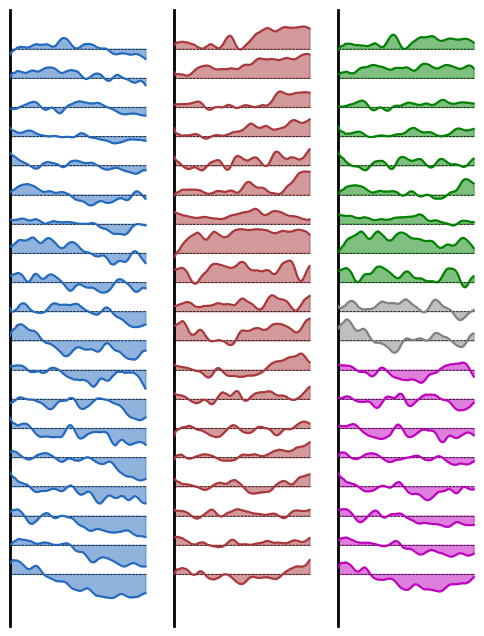

['JC057' 'GS029' 'GS028' 'JC025' 'JC048' 'GS027' 'GS030' 'JC067' 'JC044']
['GS040' 'JC062' 'GS037' 'JC028' 'JC047' 'JC029' 'JC039' 'JC059']
['JC061' 'JC052']


In [63]:
##### RUN

# Plotting H/L but sorted based on slope, on one axis

#ids = np.array(IDs)
#ids = np.setdiff1d(ids, np.array(rm))

# choice = 4

# models = np.array(models)
# model = models[np.array(nk) == choice][0]

# model.fit(X)
# x_pred = model.predict(X)

#ids = np.array(['GS029', 'JC067', 'GS027', 'JC057', 'JC067', 'GS028', 'GS030', 'JC025', 'JC044', 'JC048','GS037', 'GS040', 'JC062','JC028', 'JC029', 'JC039', 'JC047', 'JC059','JC052'])
#ids = np.array(['JC067','GS029', 'JC044', 'JC057', 'JC025', 'GS027',  'JC048', 'GS030', 'GS028', 'JC061', 'JC028', 'JC062', 'JC029', 'GS037', 'JC039', 'GS040', 'JC047' ,'JC059', 'JC052'])

ids = ordered
Xp = signedTraceMatResized.drop(rm)
Xp = Xp.loc[ids]
Xp = np.array(Xp)

Xp_avg = avgTraceMatResized.drop(rm)
Xp_avg = Xp_avg.loc[ids]
Xp_avg = np.array(Xp_avg)

#x_pred = df['label']
x_pred = [0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1]

fig, axs = psyplt.plotClustersVertThreeAx(Xp, Xp_avg, x_pred, nPointsTemp)#, plotAvg = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for ax in axs:

    ax.spines[['right', 'top','bottom']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)
    ax.set_xlim(0,100)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off
    plt.setp(axs, ylim=axs[0].get_ylim())

fig.set_size_inches(6,8)

#plt.tight_layout()
plt.show()

for ia in np.unique(x_pred):
    print(ids[x_pred == ia])

img_name = 'DTW_clustering_all_stim_three_axis_2_removed'
img_loc = 'clustering'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 
fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)


toSave = pd.DataFrame(Xp[:,0:100])
toSave.insert(loc = 0, column = 'clusterID', value = x_pred)
toSave.insert(loc = 0, column = 'id', value = ids)
toSave.set_index('id', inplace = True)
toSave.to_csv(pathtmp + 'DTW_clustering_Low_Conditional' + '.csv')

toSave = pd.DataFrame(Xp[:,100:200])
toSave.insert(loc = 0, column = 'clusterID', value = x_pred)
toSave.insert(loc = 0, column = 'id', value = ids)
toSave.set_index('id', inplace = True)
toSave.to_csv(pathtmp + 'DTW_clustering_High_Conditional' + '.csv')

toSave = pd.DataFrame(Xp_avg)
toSave.insert(loc = 0, column = 'clusterID', value = x_pred)
toSave.insert(loc = 0, column = 'id', value = ids)
toSave.set_index('id', inplace = True)
toSave.to_csv(pathtmp + 'DTW_clustering_Average_Trace' + '.csv')

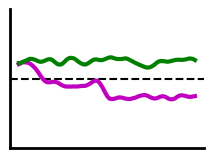

In [43]:
x_pred = pd.DataFrame([0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1])

fig, ax = psyplt.plotClustersVertAvgOnly(Xp_avg, x_pred[0], nPointsTemp)#, plotAvg = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

#for ax in axs:

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

ax.set_ylim(0.1,0.9)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left = False,
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

fig.set_size_inches(2.5,1.8)

#plt.tight_layout()
plt.show()

#for ia in np.unique(x_pred):
#    print(ids[x_pred == ia])

img_name = 'DTW_clustering_indep_traces'
img_loc = 'clustering'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

toSave = {
    'trial': np.array(range(0,100)),
    'Stationary': np.mean(Xp_avg[x_pred[0] == 0],0),
    'Drifting': np.mean(Xp_avg[x_pred[0] == 1],0)
}
toSave = pd.DataFrame(toSave)
toSave.set_index('trial', inplace = True)

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
toSave.to_csv(pathtmp + img_name + '.csv')

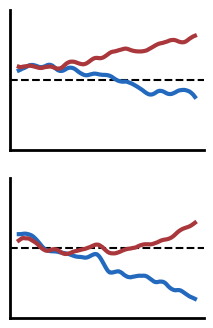

In [62]:
ids = ordered
Xp = signedTraceMatResized.drop(rm)
Xp = Xp.loc[ids]
Xp = np.array(Xp)

x_pred = pd.DataFrame([0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1])

#Xp = signedTraceMatResized.drop(rm)
#Xp = np.asarray(Xp)

fig, axs = psyplt.plotClustersVert(Xp, x_pred[0], nPoints)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for ax in axs:

    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)
    ax.set_ylim(-0.05,1.05)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off

fig.set_size_inches(2.5,4)

#plt.tight_layout()
plt.show()

img_name = 'DTW_clustering_cluster_traces'
img_loc = 'clustering'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

toSave = pd.DataFrame(Xp)
toSave.insert(loc = 0, column = 'clusterID', value = x_pred)
toSave.insert(loc = 0, column = 'id', value = ids)
toSave.set_index('id', inplace = True)

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)

toSave = {
    'trial': np.array(range(0,100)),
    'Stationary_NonPreferred': np.mean(Xp[x_pred[0] == 0, 0:100],0),
    'Stationary_Preferred': np.mean(Xp[x_pred[0] == 0, 100:200],0),
    'Drifting_NonPreferred': np.mean(Xp[x_pred[0] == 1, 0:100],0),
    'Drifting_Preferred': np.mean(Xp[x_pred[0] == 1, 100:200],0),
}

toSave = pd.DataFrame(toSave)
toSave.set_index('trial', inplace = True)
toSave.to_csv(pathtmp + img_name + '.csv')


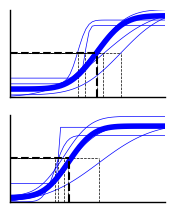

In [66]:
import pickle 
import fitFns as ff

img_name = 'thresh_psychometric'
img_loc = 'psytrack'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

sID = '5'

vars = np.zeros([5,4])

fig, ax = plt.subplots(2,1)

IDst = ['JC061', 'JC067']

for mi, ID in enumerate(IDst):
    
    toSave = {}

    dataBase =  os.path.abspath(os.path.join(curPath,"data/230927"))
    file = mf.find_files('.pkl', ID + '_biasTestingFitData', dataBase)[0]

    with open(file, 'rb') as f:
        loaded_dict_2 = pickle.load(f)

    fitType = loaded_dict_2['1']['fit_method']

    for si, sID in enumerate(['1','2','3','4','5']):
            
        f = loaded_dict_2[sID]['behavior']['stimulus_frequency']
        r = loaded_dict_2[sID]['behavior']['choice']

        nBins = 15

        binnedMean,binnedFreq, *_ = scs.binned_statistic(f, r, statistic = np.nanmean, bins = nBins, range=(f.min(),f.max()))
        binnedFreq = binnedFreq[:len(binnedFreq)-1] + (binnedFreq[1] - binnedFreq[0])/2

        #plt.plot(binnedFreq, binnedMean, label = 'data')

        fn = loaded_dict_2[sID]['function']

        if fitType == 'pymc':
            var = loaded_dict_2[sID]['fit_params']['mean']['mean'][0]
        elif fitType == 'bads':
            var = loaded_dict_2[sID]['fit_params']['mean'].loc[0,:]

        xt = np.linspace(np.log2(6000),np.log2(28000),50)

        vars[si,:] = var

        #print(var)
        fit = fn(var, xt)#, binnedFreq)
        #ll = ff.getLL(var, f, r, fn)

        ax[mi].plot(xt, fit, color = 'b', linewidth = 0.5, alpha = 1)#, label = fitType + ', ll= {}'.format(round(ll,3)))
        ax[mi].plot([np.min(xt),var[1]],[0.5,0.5],linewidth = 0.5,linestyle = '--',color = 'k')
        ax[mi].plot([var[1],var[1]],[0,0.5],linewidth = 0.5,linestyle = '--',color = 'k')
        
        toSave[sID] = fit

    varMean = np.mean(vars,0)
    fit = fn(varMean, xt)
    ax[mi].plot(xt, fit, color = 'b', linewidth = 4)
    
    ax[mi].plot([np.min(xt),varMean[1]],[0.5,0.5],linestyle = '--',color = 'k')
    ax[mi].plot([varMean[1],varMean[1]],[0,0.5],linestyle = '--',color = 'k')

    ax[mi].spines[['right', 'top']].set_visible(False)
    ax[mi].spines[['left', 'bottom']].set_linewidth(1)
    ax[mi].set_ylim(0,1)
    ax[mi].set_xlim(xt[0],xt[-1])

    ax[mi].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off

    toSave['Avg'] = fit
    toSave['stimFreq'] = xt
    toSave = pd.DataFrame(toSave)
    toSave.set_index('stimFreq', inplace = True)
    toSave.to_csv(pathtmp + img_name + '_' + ID + '.csv')

fig.set_size_inches(2,2.5)

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)


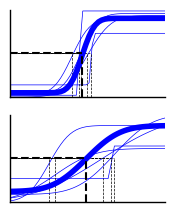

In [67]:
import pickle 
import fitFns as ff

img_name = 'thresh_variability_psychometric'
img_loc = 'psytrack'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

sID = '5'

vars = np.zeros([5,4])

fig, ax = plt.subplots(2,1)

IDst = ['JC048', 'GS028']


for mi, ID in enumerate(IDst):

    toSave = {}

    dataBase =  os.path.abspath(os.path.join(curPath,"data/230927"))
    file = mf.find_files('.pkl', ID + '_biasTestingFitData', dataBase)[0]

    with open(file, 'rb') as f:
        loaded_dict_2 = pickle.load(f)

    fitType = loaded_dict_2['1']['fit_method']

    for si, sID in enumerate(['1','2','3','4','5']):
            
        f = loaded_dict_2[sID]['behavior']['stimulus_frequency']
        r = loaded_dict_2[sID]['behavior']['choice']

        nBins = 15

        binnedMean,binnedFreq, *_ = scs.binned_statistic(f, r, statistic = np.nanmean, bins = nBins, range=(f.min(),f.max()))
        binnedFreq = binnedFreq[:len(binnedFreq)-1] + (binnedFreq[1] - binnedFreq[0])/2

        #plt.plot(binnedFreq, binnedMean, label = 'data')

        fn = loaded_dict_2[sID]['function']

        if fitType == 'pymc':
            var = loaded_dict_2[sID]['fit_params']['mean']['mean'][0]
        elif fitType == 'bads':
            var = loaded_dict_2[sID]['fit_params']['mean'].loc[0,:]

        xt = np.linspace(np.log2(6000),np.log2(28000),50)

        vars[si,:] = var

        #print(var)
        fit = fn(var, xt)#, binnedFreq)
        #ll = ff.getLL(var, f, r, fn)

        ax[mi].plot(xt, fit, color = 'b', linewidth = 0.5, alpha = 1)#, label = fitType + ', ll= {}'.format(round(ll,3)))
        ax[mi].plot([np.min(xt),var[1]],[0.5,0.5],linewidth = 0.5,linestyle = '--',color = 'k')
        ax[mi].plot([var[1],var[1]],[0,0.5],linewidth = 0.5,linestyle = '--',color = 'k')

        toSave[sID] = fit

    varMean = np.mean(vars,0)
    fit = fn(varMean, xt)
    ax[mi].plot(xt, fit, color = 'b', linewidth = 4)
    
    ax[mi].plot([np.min(xt),varMean[1]],[0.5,0.5],linestyle = '--',color = 'k')
    ax[mi].plot([varMean[1],varMean[1]],[0,0.5],linestyle = '--',color = 'k')

    ax[mi].spines[['right', 'top']].set_visible(False)
    ax[mi].spines[['left', 'bottom']].set_linewidth(1)
    ax[mi].set_ylim(0,1)
    ax[mi].set_xlim(xt[0],xt[-1])

    ax[mi].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off

    toSave['Avg'] = fit
    toSave['stimFreq'] = xt
    toSave = pd.DataFrame(toSave)
    toSave.set_index('stimFreq', inplace = True)
    toSave.to_csv(pathtmp + img_name + '_' + ID + '.csv')

fig.set_size_inches(2,2.5)
fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)


In [114]:
ids = np.setdiff1d(ids, np.array(rm))
for ia in np.unique(x_pred):
    print(ids[x_pred == ia])

['GS037' 'GS040' 'JC028' 'JC029' 'JC039' 'JC047' 'JC059' 'JC062']
['GS027' 'GS028' 'GS029' 'GS030' 'JC025' 'JC044' 'JC048' 'JC057' 'JC067']


In [3]:
# Let's look at the stability of the clusters.

X = avgTraceMatResized
X = tslearn.utils.to_time_series_dataset(X)

seed = 1008

met = "dtw"

clusterDat = np.zeros((19,19))

nr = 100

ks = np.ones((1,nr)) + 1
ks = np.squeeze(ks)

for i, k in enumerate(ks):

    km = TimeSeriesKMeans(n_clusters=int(k), metric=met, max_iter=50, random_state=seed + i)
    km.fit(X)
    x_pred = km.predict(X)

    for ix in range(0,19):
        for iy in range(0,19):
            if x_pred[ix] == x_pred[iy]:
                clusterDat[ix,iy] += 1

clusterDat = clusterDat/nr
clusterDat = pd.DataFrame(clusterDat, columns=IDs, index = IDs)
clusterDat4 = clusterDat.copy()


In [5]:
avgTraceMatResized

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
GS027,0.508030,0.545751,0.564271,0.578934,0.590901,0.617690,0.629847,0.640181,0.644587,0.649002,...,0.705992,0.737790,0.757630,0.763860,0.762621,0.755423,0.740829,0.721296,0.706697,0.691198
GS028,0.500911,0.509985,0.508156,0.507018,0.510162,0.515654,0.520642,0.528855,0.537435,0.542767,...,0.579390,0.580296,0.578548,0.577059,0.573861,0.573113,0.568153,0.564865,0.562013,0.559809
GS029,0.561779,0.562961,0.587181,0.590729,0.594689,0.600768,0.606822,0.596978,0.588767,0.579341,...,0.655804,0.663303,0.675497,0.688966,0.701617,0.709970,0.712033,0.705035,0.690002,0.662804
GS030,0.657926,0.657334,0.646864,0.641945,0.639843,0.636896,0.632807,0.634993,0.635848,0.634661,...,0.546293,0.552399,0.552489,0.550691,0.547329,0.543084,0.535533,0.527966,0.526258,0.529296
GS037,0.528323,0.540079,0.533067,0.534290,0.533015,0.533327,0.533464,0.541548,0.549392,0.558002,...,0.373398,0.386796,0.399894,0.412340,0.421636,0.422574,0.418497,0.410045,0.393686,0.374794
GS040,0.582332,0.585172,0.574900,0.573453,0.574308,0.572934,0.568130,0.569788,0.565942,0.559138,...,0.619245,0.620380,0.617501,0.607460,0.586894,0.551276,0.508793,0.463577,0.420837,0.381969
JC025,0.670184,0.602881,0.586330,0.576261,0.569913,0.542555,0.542534,0.541738,0.545164,0.546941,...,0.621888,0.612225,0.605265,0.601351,0.598951,0.601265,0.607598,0.611902,0.617208,0.625165
JC028,0.524517,0.560628,0.581901,0.583429,0.577732,0.578036,0.560101,0.537011,0.516816,0.497965,...,0.392409,0.388704,0.383004,0.379042,0.376490,0.380107,0.386533,0.399661,0.414945,0.428432
JC029,0.600339,0.595116,0.605458,0.609290,0.609288,0.608665,0.608593,0.596742,0.579985,0.559528,...,0.363782,0.354964,0.346316,0.338008,0.336521,0.337438,0.336893,0.336825,0.337286,0.337241
JC039,0.577756,0.582919,0.606726,0.614935,0.616655,0.622780,0.625288,0.615941,0.605313,0.594077,...,0.354395,0.348043,0.337308,0.326627,0.317160,0.314587,0.317529,0.325066,0.334769,0.346747


In [4]:
clusterDat4

,GS027,GS028,GS029,GS030,GS037,GS040,JC025,JC028,JC029,JC039,JC044,JC047,JC048,JC052,JC057,JC059,JC061,JC062,JC067
GS027,1.00,0.89,0.98,0.90,0.03,0.13,0.95,0.05,0.02,0.02,0.88,0.02,0.85,0.43,0.98,0.02,0.41,0.03,0.96
GS028,0.89,1.00,0.87,0.91,0.14,0.24,0.94,0.16,0.13,0.13,0.83,0.13,0.94,0.52,0.87,0.13,0.50,0.14,0.85
GS029,0.98,0.87,1.00,0.88,0.01,0.11,0.93,0.03,0.00,0.00,0.90,0.00,0.83,0.41,1.00,0.00,0.39,0.01,0.98
GS030,0.90,0.91,0.88,1.00,0.13,0.23,0.95,0.15,0.12,0.12,0.92,0.12,0.95,0.53,0.88,0.12,0.51,0.13,0.86
GS037,0.03,0.14,0.01,0.13,1.00,0.90,0.08,0.98,0.99,0.99,0.09,0.99,0.18,0.58,0.01,0.99,0.60,1.00,0.01
GS040,0.13,0.24,0.11,0.23,0.90,1.00,0.18,0.92,0.89,0.89,0.17,0.89,0.28,0.56,0.11,0.89,0.66,0.90,0.09
JC025,0.95,0.94,0.93,0.95,0.08,0.18,1.00,0.10,0.07,0.07,0.89,0.07,0.90,0.48,0.93,0.07,0.46,0.08,0.91
JC028,0.05,0.16,0.03,0.15,0.98,0.92,0.10,1.00,0.97,0.97,0.11,0.97,0.20,0.60,0.03,0.97,0.62,0.98,0.03
JC029,0.02,0.13,0.00,0.12,0.99,0.89,0.07,0.97,1.00,1.00,0.10,1.00,0.17,0.59,0.00,1.00,0.61,0.99,0.02
JC039,0.02,0.13,0.00,0.12,0.99,0.89,0.07,0.97,1.00,1.00,0.10,1.00,0.17,0.59,0.00,1.00,0.61,0.99,0.02


In [474]:
d = [0,0,0]

for n in range(0,19):
    temp = np.array(clusterDat4.iloc[n,:])
    temp = np.delete(temp,[n,])
    
    h = np.histogram(temp,[0,0.3, 0.7, 1])
    d = np.vstack([d,h[0]])

    # lines = np.array(range(0,20))/20
    # h = plt.hist(temp,lines)
    # plt.xlim([0,1])


array([[ 0,  0,  0],
       [ 8,  2,  8],
       [ 8,  2,  8],
       [ 8,  2,  8],
       [ 8,  2,  8],
       [ 9,  2,  7],
       [ 9,  2,  7],
       [ 8,  2,  8],
       [ 9,  2,  7],
       [ 9,  2,  7],
       [ 9,  2,  7],
       [ 8,  2,  8],
       [ 9,  2,  7],
       [ 8,  2,  8],
       [ 0, 17,  1],
       [ 8,  2,  8],
       [ 9,  2,  7],
       [ 0, 17,  1],
       [ 9,  2,  7],
       [ 8,  2,  8]])

In [83]:
from sklearn.mixture import GaussianMixture
X = np.vstack([h[1][:-1],h[0]])
X = np.transpose(X)

gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_


array([[ 0.5       ,  0.88888889],
       [ 0.        , 10.        ]])

In [108]:
h

(array([14,  1,  3]), array([0.  , 0.33, 0.66, 1.  ]))

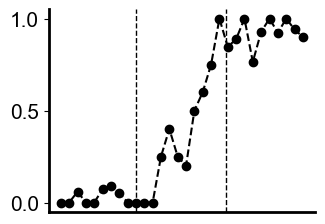

In [54]:

# It would also be great to plot the first few testing sessions for this mouse...

sIDs = ('2',)

#sIDs = ('1', '2', '3', '4', '5')

ID = 'JC052'

dataBase =  os.path.abspath(os.path.join(curPath,"data/230927"))
loaded_dict_2 = mf.loadSavedFits(ID, dataBase, ending = '_biasTestingFitData')

fig, ax = plt.subplots(1,1, figsize = (3.5, 2.5))

for sID in sIDs:

    f = loaded_dict_2[sID]['behavior']['stimulus_frequency']
    r = loaded_dict_2[sID]['behavior']['choice']

    nBins = 30

    binnedMean,binnedFreq, *_ = scs.binned_statistic(f, r, statistic = np.nanmean, bins = nBins, range=(f.min(),f.max()))
    binnedFreq = binnedFreq[:len(binnedFreq)-1] + (binnedFreq[1] - binnedFreq[0])/2

    plt.plot(binnedFreq, binnedMean, 'ko--', label = 'data', linewidth = 1.5)

    fn = loaded_dict_2[sID]['function']

    var = loaded_dict_2[sID]['fit_params']['mean'].iloc[0]
    var[3] = 0

    #print(var)

    fit = fn(var, binnedFreq)
    ll = fns.getLL(var, f, r, fn)

    #ax.plot(binnedFreq, fit, linewidth = 3)
    ax.axvline(np.log2(9800), color = 'k', linestyle = '--', linewidth = 1, zorder = 0)
    ax.axvline(np.log2(17000), color = 'k', linestyle = '--', linewidth = 1, zorder = 0)

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)
plt.tight_layout()
plt.show()

img_name = 'example_psychometric_JC052'
img_loc = 'task'

image_format = 'svg' # e.g .png, .svg, etc.
pathtmp = 'paper_figures/' + img_loc + '/' 

Xp = {
    'Freq': binnedFreq,
    'Resp': binnedMean,
}

toSave = pd.DataFrame(Xp)

fig.savefig(pathtmp + img_name + '.svg', format=image_format, dpi=1200)
toSave.to_csv(pathtmp + img_name + '.csv')

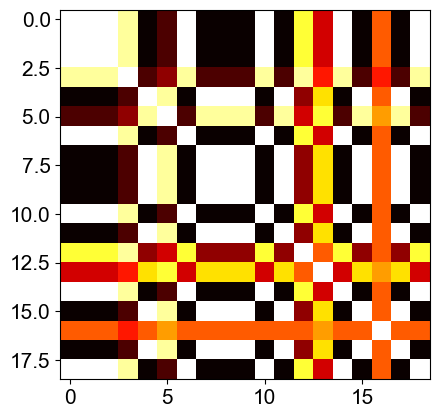

In [43]:
plt.imshow(clusterDat, cmap='hot', interpolation='nearest')
plt.show()